# Data in Wild! Camera Traps


Created dataframe with shape: (64974, 3)

First few rows:
           filename                                              image  \
0  A01/01100085.JPG  https://lilablobssc.blob.core.windows.net/orin...   
1  A01/01100087.JPG  https://lilablobssc.blob.core.windows.net/orin...   
2  A01/01140091.JPG  https://lilablobssc.blob.core.windows.net/orin...   
3  A01/01140092.JPG  https://lilablobssc.blob.core.windows.net/orin...   
4  A01/01140093.JPG  https://lilablobssc.blob.core.windows.net/orin...   

                 species  
0  dasyprocta fuliginosa  
1  dasyprocta fuliginosa  
2          pecari tajacu  
3          pecari tajacu  
4          pecari tajacu  


<Axes: xlabel='species'>

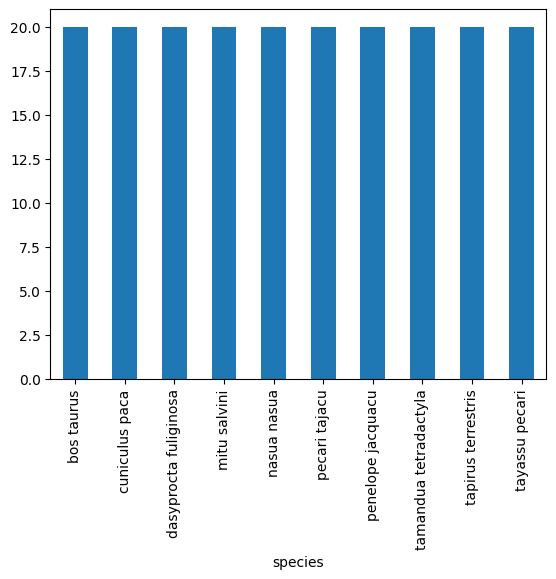

In [6]:
import pandas as pd
from datasets import load_dataset

# Load dataset
dataset = load_dataset("society-ethics/lila_camera_traps", "Orinoquia Camera Traps", split="train")
taxonomy = dataset.features["annotations"].feature["taxonomy"]

# Create empty lists to store data
filenames = []
species = []
images = []

# Extract filename and species for non-empty annotations
for example in dataset:
    species_id = example["annotations"]["taxonomy"][0]["species"]
    if species_id is not None:
        images.append(example["image"])
        filenames.append(example["file_name"])
        species_name = taxonomy["species"].int2str(species_id)
        species.append(species_name)

# Create dataframe
df = pd.DataFrame({
    'filename': filenames,
    'image': images,
    'species': species
})

print("Created dataframe with shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

# select the 20 images from the top 10 species
df = df[df['species'].isin(df['species'].value_counts().head(10).index)]
df = df.groupby('species').sample(20)

# Plot
df.groupby('species').size().plot(kind='bar')


In [7]:
from PIL import Image, ImageDraw
import requests
from io import BytesIO
import os
from tqdm import tqdm

def download_images(df, output_dir="images"):
    os.makedirs(output_dir, exist_ok=True)
    
    for _, row in tqdm(df.iterrows(), total=len(df), desc="Downloading images"):
        filename = row['filename']
        output_path = os.path.join(output_dir, filename)
        
        if os.path.exists(output_path):
            continue
            
        try:
            response = requests.get(row['image'])
            if response.status_code == 200:
                img = Image.open(BytesIO(response.content))
                img.save(output_path)
            else:
                print(f"Failed to download {filename}: Status code {response.status_code}")
        except Exception as e:
            print(f"Error downloading {filename}: {e}")

download_images(df)

Failed to download N34/101EK113/07100585.JPG: Status code 403


Failed to download N34/101EK113/07100581.JPG: Status code 403


Failed to download A07/102EK113/06220303.JPG: Status code 403


Failed to download N36/100EK113/03110364.JPG: Status code 403


Failed to download N34/101EK113/07100678.JPG: Status code 403


Failed to download A04/101EK113/06290963.JPG: Status code 403


Failed to download N04/102EK113/07100297.JPG: Status code 403


Failed to download A04/100EK113/02240739.JPG: Status code 403


Failed to download A02/100EK113/02280303.JPG: Status code 403


Failed to download A07/102EK113/06230411.JPG: Status code 403


Failed to download A07/100EK113/02130344.JPG: Status code 403


Failed to download A04/100EK113/01260434.JPG: Status code 403


Failed to download A09/100EK113/02030298.JPG: Status code 403


Failed to download A07/101EK113/06220983.JPG: Status code 403


Failed to download N34/100EK113/03070430.JPG: Status code 403


Failed to download N34/101EK113/07100668.JPG: Status code 403


Failed to download A04/101EK113/06270760.JPG: Status code 403


Failed to download N34/101EK113/07100533.JPG: Status code 403


Failed to download A09/100EK113/03150649.JPG: Status code 403


Failed to download A07/102EK113/06220304.JPG: Status code 403


Failed to download N29/108EK113/06290155.JPG: Status code 403


Failed to download N04/100EK113/02260685.JPG: Status code 403


Failed to download N12/101EK113/06200894.JPG: Status code 403


Failed to download N04/100EK113/03020801.JPG: Status code 403


Failed to download A08/100EK113/01260753.JPG: Status code 403


Failed to download N29/104EK113/04020355.JPG: Status code 403


Failed to download N04/101EK113/05240615.JPG: Status code 403


Failed to download N23/detections/04240244.JPG: Status code 403


Failed to download N04/101EK113/04300391.JPG: Status code 403


Failed to download A08/100EK113/01110103.JPG: Status code 403


Failed to download N23/detections/04200050.JPG: Status code 403


Failed to download N09/100EK113/03130707.JPG: Status code 403


Failed to download N08/100EK113/02100208.JPG: Status code 403


Failed to download N01/101EK113/07170165.JPG: Status code 403


Failed to download N08/100EK113/04160974.JPG: Status code 403


Failed to download N29/100EK113/01250859.JPG: Status code 403


Failed to download N23/detections/05170686.JPG: Status code 403


Failed to download N29/100EK113/01230572.JPG: Status code 403


Failed to download N29/107EK113/05270471.JPG: Status code 403


Failed to download N29/100EK113/01140169.JPG: Status code 403


Failed to download N14/100EK113/01130061.JPG: Status code 403


Failed to download N13/102EK113/06070177.JPG: Status code 403


Failed to download N13/100EK113/01180205.JPG: Status code 403


Failed to download N14/102EK113/05060689.JPG: Status code 403


Failed to download M05/102EK113/07090864.JPG: Status code 403


Failed to download N27/102EK113/06280824.JPG: Status code 403


Failed to download M00/104EK113/07190477.JPG: Status code 403


Failed to download N23/detections/01300241.JPG: Status code 403


KeyboardInterrupt: 

The goal of this notebook is to download a sample dataset from lila.science, organize and prepare it for a simple machine learning model

In [7]:
# Create local file path for each image
df 

KeyboardInterrupt: 

## Key Terminology

In the pytorch universe there are three key elements, datasets, dataloaders and models.

Torch datasets are abstractions that handle data loading and preprocessing. They are typically subclasses of `torch.utils.data.Dataset` and define two main methods: `__len__` (returns the size of the dataset) and `__getitem__` (retrieves a data sample).

Dataloaders, implemented via `torch.utils.data.DataLoader`, provide an iterable over a dataset, enabling efficient batching, shuffling, and parallel data loading.

Models in PyTorch are defined as subclasses of `torch.nn.Module`. They encapsulate layers and define the forward pass of the network.

PyTorch Lightning modules integrate these components by organizing the training, validation, and testing logic. A `LightningModule` defines methods like `training_step`, `validation_step`, and `test_step`, and connects datasets, dataloaders, and models into a cohesive workflow. This abstraction simplifies training loops and enables seamless integration with hardware accelerators.

In [9]:
from sklearn.model_selection import train_test_split

# Train test split
# Filter out classes with less than 5 images
class_counts = df["species"].value_counts()
valid_classes = class_counts[class_counts >= 5].index
filtered_annotations = df[df["species"].isin(valid_classes)]

# Split images into train and test sets
train_images = []
test_images = []

for common_name in valid_classes:
    class_images = filtered_annotations[filtered_annotations["species"] == common_name]["filename"].tolist()
    if len(class_images) > 5:
        train, test = train_test_split(class_images, test_size=5, random_state=42)
        train_images.extend(train)
        test_images.extend(test)

print("valid_classes: ", valid_classes)
print("Number of train images: ", len(train_images))
print("Number of test images: ", len(test_images))

valid_classes:  Index(['bos taurus', 'cuniculus paca', 'dasyprocta fuliginosa', 'mitu salvini',
       'nasua nasua', 'pecari tajacu', 'penelope jacquacu',
       'tamandua tetradactyla', 'tapirus terrestris', 'tayassu pecari'],
      dtype='object', name='species')
Number of train images:  150
Number of test images:  50


In [10]:
import torch
from torch.utils.data import Dataset
from PIL import Image

class WildlifeDataset(Dataset):
    def __init__(self, image_paths, annotations, transform=None):
        self.image_paths = image_paths
        self.annotations = annotations
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.annotations.loc[self.annotations['filename'] == img_path, 'species'].values[0]
        
        # Load the image
        image = Image.open(img_path).convert("RGB")
        
        # Apply transformations if provided
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Example usage
train_dataset = WildlifeDataset(train_images, filtered_annotations)
test_dataset = WildlifeDataset(test_images, filtered_annotations)

In [11]:
from torch.utils.data import DataLoader

# Dataloader

# Create DataLoaders for train and test datasets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Example: Iterate through the train_loader
for images, labels in train_loader:
    print(f"Batch size: {len(images)}")
    break

FileNotFoundError: [Errno 2] No such file or directory: 'A07/100EK113/03200600.JPG'

## Terminología Clave de un Módulo de PyTorch Lightning

### Terminología Clave
1. **Datasets**: Abstracciones que manejan la carga y preprocesamiento de datos. Son subclases de `torch.utils.data.Dataset` y definen dos métodos principales: `__len__` (devuelve el tamaño del conjunto de datos) y `__getitem__` (recupera una muestra de datos).

2. **Dataloaders**: Implementados mediante `torch.utils.data.DataLoader`, proporcionan un iterable sobre un conjunto de datos, permitiendo un batching eficiente, mezcla de datos y carga paralela.

3. **Models**: Definidos como subclases de `torch.nn.Module`. Encapsulan capas y definen el paso hacia adelante (forward pass) de la red.

4. **LightningModule**: Un módulo de PyTorch Lightning que organiza la lógica de entrenamiento, validación y prueba. Define métodos como `training_step`, `validation_step` y `test_step`, conectando datasets, dataloaders y modelos en un flujo de trabajo cohesivo. Esta abstracción simplifica los bucles de entrenamiento y permite una integración fluida con aceleradores de hardware.



In [ ]:
import pytorch_lightning as pl
from torch import nn

import torchvision.models as models
import torch.optim as optim

class ResNetClassifier(pl.LightningModule):
    def __init__(self, num_classes):
        super(ResNetClassifier, self).__init__()
        # Load a pre-trained ResNet model
        self.model = models.resnet18(pretrained=True)
        # Replace the final fully connected layer to match the number of classes
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)
        self.criterion = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        images, labels = batch
        outputs = self(images)
        loss = self.criterion(outputs, labels)
        self.log("train_loss", loss)
        return loss

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=1e-3)
        return optimizer

# Instantiate the model
num_classes = len(valid_classes)
model = ResNetClassifier(num_classes)

# Create a PyTorch Lightning trainer
trainer = pl.Trainer(max_epochs=1)

# Fit the model
trainer.fit(model, train_loader)

KeyboardInterrupt: 